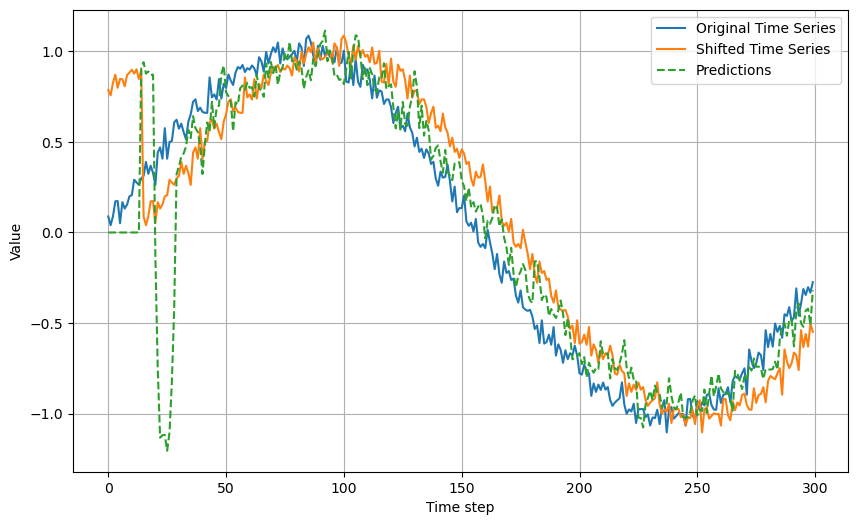

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Parameters
n_points = 1000  # Number of points in the time series
time_shift = 15  # How many steps to shift for the second time series

# 1. Generate a time series
np.random.seed(0)  # Seed for reproducibility
time_series = np.sin(np.linspace(0, 20, n_points)) + 0.1*np.random.normal(scale=0.5, size=n_points)

# 2. Create a second time series by shifting the first one
shifted_series = np.roll(time_series, time_shift)

# 3. Construct feature matrix and label vector using sliding windows
window_size = 10  # Size of the window to create features
feature_length = n_points - window_size - time_shift + 1

features = np.empty((feature_length, window_size))
labels = np.empty(feature_length)

for i in range(feature_length):
    features[i] =shifted_series [i:i + window_size]
    labels[i] = time_series [i + window_size + 4]

# 4. Train a Linear Regression model
model = LinearRegression()
model.fit(features, labels)

# 5. Make predictions
predictions = model.predict(features)
forecast = np.zeros(time_series.shape)

for i in range(feature_length):
    forecast[i + window_size + 4]=predictions[i]

# 6. Plot results
plt.figure(figsize=(10, 6))
plt.plot(time_series[0:300], label='Original Time Series')
plt.plot(shifted_series[0:300], label='Shifted Time Series')
plt.plot(forecast[0:300], label='Predictions', linestyle='--')
plt.legend()
plt.xlabel('Time step')
plt.ylabel('Value')
plt.grid(True)
plt.show()
